#### **Model Training**

#### **1.1 Import Data and Required Packages**

In this section, we will import the necessary libraries and packages required for our data analysis and modeling process. Properly importing libraries is crucial for ensuring our analysis runs smoothly and efficiently.

#### **Basic Imports**

First, we need to import the fundamental libraries for data manipulation, visualization, and modeling. Below are the essential libraries we will use:


In [107]:
# Importing Logistic Regression model from sklearn for binary and multiclass classification tasks
from sklearn.linear_model import LogisticRegression  # type: ignore

# Importing Decision Tree Classifier from sklearn, a versatile model used for classification and regression tasks
from sklearn.tree import DecisionTreeClassifier  # type: ignore

# Importing ensemble models: 
# Random Forest for robust classification/regression using multiple decision trees 
# AdaBoost for boosting weak classifiers to improve model accuracy
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier  # type: ignore

# Importing K-Neighbors Classifier from sklearn, a simple yet effective algorithm for classification based on proximity to training examples
from sklearn.neighbors import KNeighborsClassifier  # type: ignore

# Importing XGBClassifier from the XGBoost library, an optimized gradient boosting algorithm widely used in competitions for its high performance
from xgboost import XGBClassifier  # type: ignore

# Importing CatBoostClassifier from the CatBoost library, a gradient boosting algorithm that handles categorical features naturally and effectively
from catboost import CatBoostClassifier  # type: ignore 

# Importing metrics for evaluating model performance:
# accuracy_score for overall accuracy
# precision_score for precision of positive predictions
# recall_score for sensitivity (true positive rate)
# f1_score for the balance between precision and recall
# confusion_matrix for visualizing model prediction performance
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # type: ignore #

# Importing pandas for data manipulation and analysis, especially for handling structured data (like DataFrames)
import pandas as pd # type: ignore

# Importing Matplotlib for creating static, interactive, and animated visualizations in Python
import matplotlib.pyplot as plt  # type: ignore

# Importing Seaborn for making statistical graphics based on Matplotlib, with a high-level interface for drawing attractive plots
import seaborn as sns  # type: ignore


#### **Importing the CSV Data as a Pandas DataFrame**
In this section, we will import our dataset from a CSV file into a Pandas DataFrame. This allows us to manipulate and analyze the data easily.


In [108]:
# Importing the pandas library, which is essential for data manipulation and analysis
import pandas as pd # type: ignore

# Reading a CSV file named 'heart.csv' located in the 'data' directory
# This file likely contains heart-related data, possibly for a health or medical analysis
df = pd.read_csv('data/heart.csv')  # Note: Use forward slashes (/) for cross-platform compatibility

# Displaying the first five rows of the DataFrame to get a quick overview of the data structure and content
df.head()


,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


#### **Analysis of Categorical Variables in the DataFrame**

The following code prints the unique categories present in various categorical variables of the DataFrame `df`. Each variable represents a different aspect of the dataset related to heart health.

In [109]:
# Printing unique categories in the 'Sex' (gender) column
print("Categories in 'gender' variable:     ", end=" ")
print(df['Sex'].unique())  # df['Sex'].unique() retrieves unique values from the 'Sex' column

# Printing unique categories in the 'ChestPainType' column
print("Categories in 'ChestPainType' variable:  ", end=" ")
print(df['ChestPainType'].unique())  # Retrieves unique chest pain types from the 'ChestPainType' column

# Printing unique categories in the 'RestingECG' column
print("Categories in 'RestingECG' variable:", end=" ")
print(df['RestingECG'].unique())  # Retrieves unique values for resting electrocardiographic results

# Printing unique categories in the 'ExerciseAngina' column
print("Categories in 'ExerciseAngina' variable:     ", end=" ")
print(df['ExerciseAngina'].unique())  # Retrieves unique values indicating exercise-induced angina

# Printing unique categories in the 'ST_Slope' column
print("Categories in 'ST_Slope' variable:     ", end=" ")
print(df['ST_Slope'].unique())  # Retrieves unique values for the slope of the ST segment


Categories in 'gender' variable:      ['M' 'F']
Categories in 'ChestPainType' variable:   ['ATA' 'NAP' 'ASY' 'TA']
Categories in 'RestingECG' variable: ['Normal' 'ST' 'LVH']
Categories in 'ExerciseAngina' variable:      ['N' 'Y']
Categories in 'ST_Slope' variable:      ['Up' 'Flat' 'Down']


#### **Data Preparation for Machine Learning**

#### **Introduction**
In this notebook, we will perform data preparation steps necessary for building a machine learning model. This includes identifying categorical variables, converting them into dummy variables, and transforming boolean values into integer representations.

In [110]:
# Convert categorical variables to the 'category' data type for efficient memory usage and better handling
df['Sex'] = df['Sex'].astype('category')  # Converting 'Sex' to categorical type
df['ChestPainType'] = df['ChestPainType'].astype('category')  # Converting 'ChestPainType' to categorical type
df['RestingECG'] = df['RestingECG'].astype('category')  # Converting 'RestingECG' to categorical type
df['ExerciseAngina'] = df['ExerciseAngina'].astype('category')  # Converting 'ExerciseAngina' to categorical type
df['ST_Slope'] = df['ST_Slope'].astype('category')  # Converting 'ST_Slope' to categorical type

# Selecting and displaying the names of columns with 'category' data type
category_columns = df.select_dtypes(['category']).columns
print("Categorical columns:", category_columns)  # Optional: Print the categorical columns for verification

# Convert categorical variables into dummy variables (one-hot encoding)
# drop_first=True prevents the dummy variable trap by dropping the first category
sex_dummies = pd.get_dummies(df['Sex'], drop_first=True)  # Create dummy variables for 'Sex'
chestpain_dummies = pd.get_dummies(df['ChestPainType'], drop_first=True)  # Dummy variables for 'ChestPainType'
restingecg_dummies = pd.get_dummies(df['RestingECG'], drop_first=True)  # Dummy variables for 'RestingECG'
exerciseangina_dummies = pd.get_dummies(df['ExerciseAngina'], drop_first=True)  # Dummy variables for 'ExerciseAngina'
stslope_dummies = pd.get_dummies(df['ST_Slope'], drop_first=True)  # Dummy variables for 'ST_Slope'

# Add the newly created dummy variables to the original DataFrame
df = pd.concat([df, sex_dummies, chestpain_dummies, restingecg_dummies, exerciseangina_dummies, stslope_dummies], axis=1)

# Drop the original categorical columns since they've been encoded into dummy variables
df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis=1, inplace=True)

# View the first few rows of the updated DataFrame to confirm changes
print(df.head(5))  # Display the first 5 rows of the updated DataFrame


Categorical columns: Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')
   Age  RestingBP  Cholesterol  FastingBS  ...     ST      Y   Flat     Up
0   40        140          289          0  ...  False  False  False   True
1   49        160          180          0  ...  False  False   True  False
2   37        130          283          0  ...   True  False  False   True
3   48        138          214          0  ...  False   True   True  False
4   54        150          195          0  ...  False  False  False   True

[5 rows x 16 columns]


In [111]:
# Convert all boolean columns to integers (0s and 1s)
for col in df.select_dtypes(include=[bool]).columns:
    df[col] = df[col].astype(int)

# Check the DataFrame to see the changes
print(df.head())

   Age  RestingBP  Cholesterol  FastingBS  MaxHR  ...  Normal  ST  Y  Flat  Up
0   40        140          289          0    172  ...       1   0  0     0   1
1   49        160          180          0    156  ...       1   0  0     1   0
2   37        130          283          0     98  ...       0   1  0     0   1
3   48        138          214          0    108  ...       1   0  1     1   0
4   54        150          195          0    122  ...       1   0  0     0   1

[5 rows x 16 columns]


In [112]:
df.head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           918 non-null    int64  
 1   RestingBP     918 non-null    int64  
 2   Cholesterol   918 non-null    int64  
 3   FastingBS     918 non-null    int64  
 4   MaxHR         918 non-null    int64  
 5   Oldpeak       918 non-null    float64
 6   HeartDisease  918 non-null    int64  
 7   M             918 non-null    int32  
 8   ATA           918 non-null    int32  
 9   NAP           918 non-null    int32  
 10  TA            918 non-null    int32  
 11  Normal        918 non-null    int32  
 12  ST            918 non-null    int32  
 13  Y             918 non-null    int32  
 14  Flat          918 non-null    int32  
 15  Up            918 non-null    int32  
dtypes: float64(1), int32(9), int64(6)
memory usage: 82.6 KB


In [114]:
df.shape

(918, 16)

#### **Preparing X and Y trin and Test**

In this section, we will prepare the feature set `X` and the target variable `Y` for our machine learning model. We will drop the  column from the DataFrame to create `X`, which will contain the features used for prediction. The `Y` variable will be the  column that we want to predict.


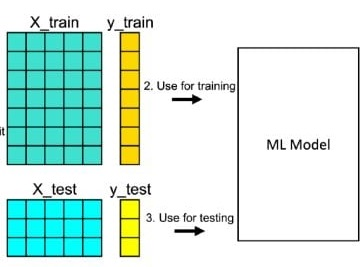

In [115]:
# Split data to be used in the models
# Create matrix of features
x = df.drop('HeartDisease', axis = 1) # grabs everything else but 'Survived'

# Create target variable
y = df['HeartDisease'] # y is the column we're trying to predict


In [116]:
x

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,M,ATA,NAP,TA,Normal,ST,Y,Flat,Up
0,40,140,289,0,172,0.0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,0,1,0,0,0,0,0,1,0


In [117]:
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [118]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split # type: ignore
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((734, 15), (184, 15))

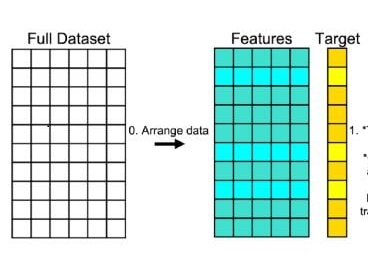

In [119]:
y_train

795    0
25     0
84     1
10     0
344    1
      ..
106    0
270    0
860    1
435    0
102    1
Name: HeartDisease, Length: 734, dtype: int64

In [120]:
y_test.shape

(184,)

#### **Model Training and Evaluation**

In this section, we will define various machine learning models, train them on our dataset, and evaluate their performance using several metrics. 

#### **1.2 Define Models**

We will start by creating a dictionary of different models we intend to train. The models include:


In [121]:
# Dictionary of models to be evaluated
models = {
    "Logistic Regression": LogisticRegression(),  # Logistic Regression model
    "K-Neighbors Classifier": KNeighborsClassifier(),  # K-Nearest Neighbors model
    "Decision Tree Classifier": DecisionTreeClassifier(),  # Decision Tree model
    "Random Forest Classifier": RandomForestClassifier(),  # Random Forest model
    "XGBClassifier": XGBClassifier(),  # XGBoost model
    "CatBoost Classifier": CatBoostClassifier(verbose=False),  # CatBoost model with verbosity off
    "AdaBoost Classifier": AdaBoostClassifier()  # AdaBoost model
}

# Function to evaluate model performance based on various metrics
def evaluate_model(y_true, y_pred):
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_true, y_pred)  # Calculate accuracy
    precision = precision_score(y_true, y_pred, average='weighted')  # Calculate precision
    recall = recall_score(y_true, y_pred, average='weighted')  # Calculate recall
    f1 = f1_score(y_true, y_pred, average='weighted')  # Calculate F1 Score
    
    return accuracy, precision, recall, f1  # Return the calculated metrics

# Lists to store model names and their test accuracies
model_list = []  # To store names of models
accuracy_list = []  # To store test accuracies of models

# Loop through each model, train it, and evaluate its performance
for model_name, model in models.items():
    model.fit(X_train, y_train)  # Train the model on the training data
    
    # Make predictions on both training and testing sets
    y_train_pred = model.predict(X_train)  # Predictions on training set
    y_test_pred = model.predict(X_test)  # Predictions on testing set
    
    # Evaluate performance on the training set
    train_accuracy, train_precision, train_recall, train_f1 = evaluate_model(y_train, y_train_pred)
    
    # Evaluate performance on the test set
    test_accuracy, test_precision, test_recall, test_f1 = evaluate_model(y_test, y_test_pred)

    # Store the model name and its test accuracy
    model_list.append(model_name)  # Append model name to the list
    accuracy_list.append(test_accuracy)  # Append test accuracy to the list

    # Print model evaluation results
    print(f"{model_name} Performance:")
    
    print("Training Set Performance:")
    print(f"- Accuracy: {train_accuracy:.4f}")  # Print training accuracy
    print(f"- Precision: {train_precision:.4f}")  # Print training precision
    print(f"- Recall: {train_recall:.4f}")  # Print training recall
    print(f"- F1-Score: {train_f1:.4f}")  # Print training F1 score
    
    print("Test Set Performance:")
    print(f"- Accuracy: {test_accuracy:.4f}")  # Print test accuracy
    print(f"- Precision: {test_precision:.4f}")  # Print test precision
    print(f"- Recall: {test_recall:.4f}")  # Print test recall
    print(f"- F1-Score: {test_f1:.4f}")  # Print test F1 score
    
    print("=" * 100)  # Print separator line for better readability

# Summary of test accuracies
print("Summary of Test Accuracies:")
for model_name, accuracy in zip(model_list, accuracy_list):
    print(f"{model_name}: Accuracy = {accuracy:.4f}")  # Print each model's name and accuracy


c:\Users\SURESH BEEKHANI\Desktop\Heart Attack  Prediction\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Performance:
Training Set Performance:
- Accuracy: 0.8760
- Precision: 0.8761
- Recall: 0.8760
- F1-Score: 0.8758
Test Set Performance:
- Accuracy: 0.8533
- Precision: 0.8556
- Recall: 0.8533
- F1-Score: 0.8538
K-Neighbors Classifier Performance:
Training Set Performance:
- Accuracy: 0.7956
- Precision: 0.7954
- Recall: 0.7956
- F1-Score: 0.7951
Test Set Performance:
- Accuracy: 0.7065
- Precision: 0.7142
- Recall: 0.7065
- F1-Score: 0.7083
Decision Tree Classifier Performance:
Training Set Performance:
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
Test Set Performance:
- Accuracy: 0.8424
- Precision: 0.8421
- Recall: 0.8424
- F1-Score: 0.8422
Random Forest Classifier Performance:
Training Set Performance:
- Accuracy: 1.0000
- Precision: 1.0000
- Recall: 1.0000
- F1-Score: 1.0000
Test Set Performance:
- Accuracy: 0.8696
- Precision: 0.8702
- Recall: 0.8696
- F1-Score: 0.8698
XGBClassifier Performance:
Training Set Performance:
- Accuracy

c:\Users\SURESH BEEKHANI\Desktop\Heart Attack  Prediction\venv\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


#### **Creating a Summary model Accuracy**

In this section, we will create a summary DataFrame that consolidates the model names and their corresponding accuracies. This will help us easily visualize and compare the performance of different models.


In [122]:
import pandas as pd  # type: ignore
pd.DataFrame(list(zip(model_list, accuracy_list)), columns=['Model Name', 'Accuracy'])

,Model Name,Accuracy
0,Logistic Regression,0.853261
1,K-Neighbors Classifier,0.706522
2,Decision Tree Classifier,0.842391
3,Random Forest Classifier,0.869565
4,XGBClassifier,0.858696
5,CatBoost Classifier,0.875000
6,AdaBoost Classifier,0.847826


#### **Random Forest Classifier Implementation**

In this section, we will initialize a Random Forest Classifier, fit it to our training data, make predictions on the test data, and then calculate and print the precision score of the model.

#### **Initialize the Random Forest Classifier**

> **Note:** The parameter `fit_intercept` does not exist for `RandomForestClassifier`, so it should be removed.


In [123]:
# Initialize the Random Forest Classifier
# Note: The parameter 'fit_intercept' does not exist for RandomForestClassifier,
# so it should be removed. 
lin_model = RandomForestClassifier()  # Create a RandomForestClassifier instance

# Fit the model to the training data
lin_model.fit(X_train, y_train)  # Train the model on the training set

# Make predictions on the test set
y_pred = lin_model.predict(X_test)  # Predict the labels for the test set

# Calculate the precision score of the model
# Precision is calculated as the ratio of correctly predicted positive observations
precision = precision_score(y_test, y_pred) * 100  # Calculate precision and convert to percentage

# Print the precision score
print("Precision of the model is %.2f%%" % precision)  # Print precision as a percentage


Precision of the model is 89.52%


 #### **Making Predictions**
In this section, we will use the trained Logistic Regression model to make predictions on the test dataset. We'll also examine the shape of the predictions to ensure they align with our expectations.

#### **3.1 Predicting Outcomes**

After fitting the Logistic Regression model to the training data, we can now use it to predict outcomes for the test data. The `predict` method will generate the predicted labels for the provided features.

In [124]:
# Predict
y_pred= lin_model.predict(X_test)
print(y_pred)
print(y_pred.shape)

[0 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 0 1
 0 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 0 0 1 0 1
 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0
 0 0 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 1]
(184,)


#### **Probabilities of each class**

The predict_proba method returns an array where each row sums to 1, as it contains the probabilities of the sample belonging to each class. For a binary classification problem, the first column corresponds to the probability of the sample being in class 0, and the second column corresponds to the probability of the sample being in class 1.

In [125]:
probabilities = lin_model.predict_proba(X_test)[:, 1]
print(probabilities.shape)
print(probabilities)

(184,)
[0.07 0.74 0.94 0.94 0.08 0.64 0.86 0.14 0.61 0.93 0.75 0.12 0.64 0.18
 0.88 0.72 0.13 0.67 0.64 0.28 0.82 0.87 0.   0.45 0.65 0.93 0.02 0.82
 0.01 0.01 0.89 0.02 0.67 0.91 0.81 0.37 0.99 0.   0.85 0.75 0.75 0.76
 0.58 0.06 0.11 0.66 0.71 0.95 0.99 0.66 0.09 0.05 0.93 0.98 0.39 0.21
 0.42 0.9  0.61 0.88 0.2  0.05 0.   0.92 0.06 0.99 0.93 0.88 0.98 0.59
 0.62 0.02 0.71 0.68 0.05 0.74 0.2  0.74 0.21 0.64 0.38 0.83 0.89 0.06
 0.96 0.76 0.07 0.69 0.   0.25 0.21 0.95 0.95 0.34 0.66 0.   0.88 0.29
 0.85 0.72 0.23 0.96 0.76 0.03 0.66 0.84 0.08 0.41 0.91 0.27 0.79 0.94
 0.12 0.23 0.95 0.13 0.76 0.03 0.94 0.77 0.93 0.79 0.82 0.62 0.11 0.
 0.11 0.42 0.02 0.44 0.31 1.   0.94 0.2  0.94 0.2  0.64 0.75 0.   0.66
 0.2  0.16 0.87 0.7  0.93 0.74 0.85 0.21 0.14 0.33 0.   0.54 0.84 0.08
 0.74 0.05 0.06 0.07 0.02 0.91 0.07 0.08 0.94 0.04 0.9  0.98 0.6  0.88
 0.32 0.35 0.99 0.93 0.04 0.86 0.02 0.91 0.47 0.59 0.05 0.68 0.66 0.99
 0.06 0.97]


#### **Probabilities of each class**
The predict_proba method returns an array where each row sums to 1, as it contains the probabilities of the sample belonging to each class. For a binary classification problem, the first column corresponds to the probability of the sample being in class 0, and the second column corresponds to the probability of the sample being in class 1.

In [126]:
for i in range(len(y_test)):
  print(round(probabilities[i], 3)," --> ", y_pred[i])

0.07  -->  0
0.74  -->  1
0.94  -->  1
0.94  -->  1
0.08  -->  0
0.64  -->  1
0.86  -->  1
0.14  -->  0
0.61  -->  1
0.93  -->  1
0.75  -->  1
0.12  -->  0
0.64  -->  1
0.18  -->  0
0.88  -->  1
0.72  -->  1
0.13  -->  0
0.67  -->  1
0.64  -->  1
0.28  -->  0
0.82  -->  1
0.87  -->  1
0.0  -->  0
0.45  -->  0
0.65  -->  1
0.93  -->  1
0.02  -->  0
0.82  -->  1
0.01  -->  0
0.01  -->  0
0.89  -->  1
0.02  -->  0
0.67  -->  1
0.91  -->  1
0.81  -->  1
0.37  -->  0
0.99  -->  1
0.0  -->  0
0.85  -->  1
0.75  -->  1
0.75  -->  1
0.76  -->  1
0.58  -->  1
0.06  -->  0
0.11  -->  0
0.66  -->  1
0.71  -->  1
0.95  -->  1
0.99  -->  1
0.66  -->  1
0.09  -->  0
0.05  -->  0
0.93  -->  1
0.98  -->  1
0.39  -->  0
0.21  -->  0
0.42  -->  0
0.9  -->  1
0.61  -->  1
0.88  -->  1
0.2  -->  0
0.05  -->  0
0.0  -->  0
0.92  -->  1
0.06  -->  0
0.99  -->  1
0.93  -->  1
0.88  -->  1
0.98  -->  1
0.59  -->  1
0.62  -->  1
0.02  -->  0
0.71  -->  1
0.68  -->  1
0.05  -->  0
0.74  -->  1
0.2  -->  0
0.74 

#### **Comparing Actual and Predicted Values**

In this section, we will create a DataFrame that compares the actual values of the target variable with the predicted values generated by our Logistic Regression model. This will also include a column to show the difference between the actual and predicted values.

#### 5.1 **Creating the Prediction DataFrame**

We will create a new DataFrame called `pred_df`. This DataFrame will contain three columns:

- **Actual Value**: The true values from the test dataset.
- **Predicted Value**: The values predicted by the model.
- **Difference**: The difference between the actual and predicted values.

We will utilize the `pd.DataFrame` constructor to create this DataFrame.


In [127]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
668,0,0,0
30,1,1,0
377,1,1,0
535,1,1,0
807,0,0,0
...,...,...,...
211,1,1,0
745,1,1,0
584,1,1,0
878,0,0,0


#### **Visualizing Actual vs Predicted Values**

In this section, we will create a scatter plot to visually compare the actual values of the target variable with the predicted values generated by our Logistic Regression model. This visualization helps us assess how closely the predictions align with the actual outcomes.

#### **7.1 Importing Required Libraries**

First, ensure that we have imported the necessary libraries for data visualization. We will use **Matplotlib** for plotting and **Seaborn** for enhanced aesthetics.


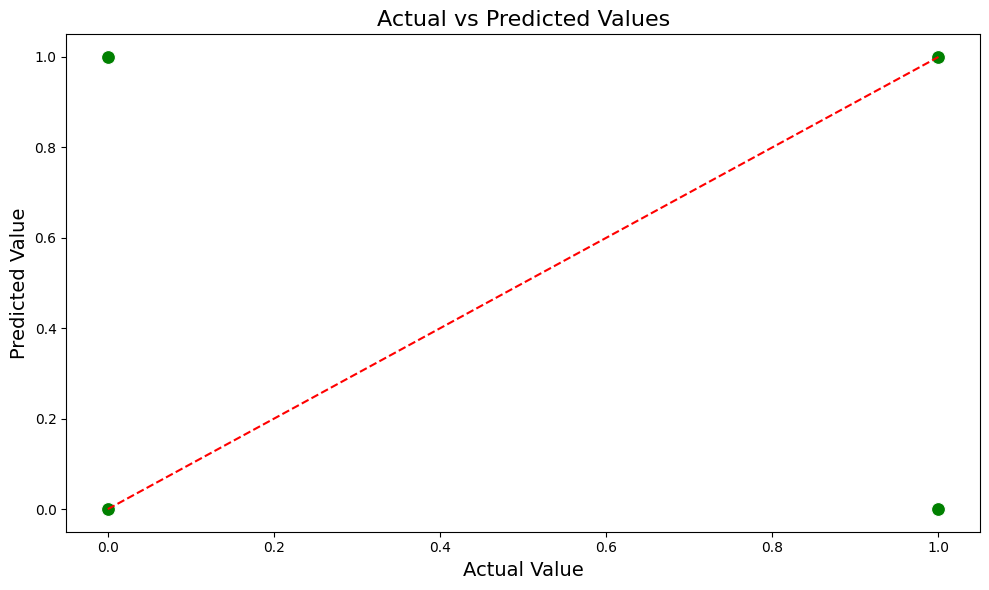

In [128]:
# Create a figure with subplots
plt.figure(figsize=(10, 6))

# Scatter plot of actual vs predicted
sns.scatterplot(x=y_test, y=y_pred, color='green', s=100)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Set the title and labels
plt.title('Actual vs Predicted Values', fontsize=16)
plt.xlabel('Actual Value', fontsize=14)
plt.ylabel('Predicted Value', fontsize=14)
# Show the plot
plt.tight_layout()
plt.show()
